In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
df = pd.read_csv('housepricedata.csv')
print(df.head(5))

   LotArea  OverallQual  OverallCond  TotalBsmtSF  FullBath  HalfBath  \
0     8450            7            5          856         2         1   
1     9600            6            8         1262         2         0   
2    11250            7            5          920         2         1   
3     9550            7            5          756         1         0   
4    14260            8            5         1145         2         1   

   BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageArea  AboveMedianPrice  
0             3             8           0         548                 1  
1             3             6           1         460                 1  
2             3             6           1         608                 1  
3             3             7           1         642                 0  
4             4             9           1         836                 1  


In [3]:
dataset = df.values
X = dataset[:,0:10]
Y = dataset[:,10]

In [4]:
min_max_scaler = preprocessing.MinMaxScaler() 
X_scale = min_max_scaler.fit_transform(X)
print(X_scale)

[[0.0334198  0.66666667 0.5        ... 0.5        0.         0.3864598 ]
 [0.03879502 0.55555556 0.875      ... 0.33333333 0.33333333 0.32440056]
 [0.04650728 0.66666667 0.5        ... 0.33333333 0.33333333 0.42877292]
 ...
 [0.03618687 0.66666667 1.         ... 0.58333333 0.66666667 0.17771509]
 [0.03934189 0.44444444 0.625      ... 0.25       0.         0.16925247]
 [0.04037019 0.44444444 0.625      ... 0.33333333 0.         0.19464034]]


In [5]:
X_train, X_val_test, Y_train, Y_val_test = train_test_split(X_scale, Y, test_size = 0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_test, Y_val_test, test_size = 0.5)
print(X_train.shape, X_val.shape, X_test.shape,Y_train.shape,Y_val.shape,Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [6]:
model = Sequential([Dense(32,activation = 'relu',input_shape = (10,)), Dense(32,activation = 'relu'), Dense(1,activation = 'sigmoid'),])
model.compile(optimizer = 'sgd',loss = 'binary_crossentropy',metrics = ['accuracy'])
hist = model.fit(X_train,Y_train, batch_size = 32, epochs = 100, validation_data = (X_val,Y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 222us/step - loss: 0.6801 - accuracy: 0.6840 - val_loss: 0.6641 - val_accuracy: 0.7808
Epoch 2/100
1022/1022 [==============================] - 0s 52us/step - loss: 0.6663 - accuracy: 0.6350 - val_loss: 0.6543 - val_accuracy: 0.7306
Epoch 3/100
1022/1022 [==============================] - 0s 56us/step - loss: 0.6586 - accuracy: 0.6438 - val_loss: 0.6467 - val_accuracy: 0.6849
Epoch 4/100
1022/1022 [==============================] - 0s 47us/step - loss: 0.6517 - accuracy: 0.6321 - val_loss: 0.6393 - val_accuracy: 0.7260
Epoch 5/100
1022/1022 [==============================] - 0s 60us/step - loss: 0.6451 - accuracy: 0.6771 - val_loss: 0.6322 - val_accuracy: 0.7352
Epoch 6/100
1022/1022 [==============================] - 0s 47us/step - loss: 0.6386 - accuracy: 0.6918 - val_loss: 0.6253 - va

Epoch 53/100
1022/1022 [==============================] - 0s 46us/step - loss: 0.3512 - accuracy: 0.8650 - val_loss: 0.3084 - val_accuracy: 0.8904
Epoch 54/100
1022/1022 [==============================] - 0s 37us/step - loss: 0.3481 - accuracy: 0.8679 - val_loss: 0.3057 - val_accuracy: 0.8904
Epoch 55/100
1022/1022 [==============================] - 0s 38us/step - loss: 0.3455 - accuracy: 0.8650 - val_loss: 0.3031 - val_accuracy: 0.8995
Epoch 56/100
1022/1022 [==============================] - 0s 43us/step - loss: 0.3431 - accuracy: 0.8699 - val_loss: 0.2996 - val_accuracy: 0.8950
Epoch 57/100
1022/1022 [==============================] - 0s 39us/step - loss: 0.3408 - accuracy: 0.8640 - val_loss: 0.2968 - val_accuracy: 0.8904
Epoch 58/100
1022/1022 [==============================] - 0s 39us/step - loss: 0.3381 - accuracy: 0.8718 - val_loss: 0.2948 - val_accuracy: 0.8950
Epoch 59/100
1022/1022 [==============================] - 0s 43us/step - loss: 0.3366 - accuracy: 0.8699 - val_loss: 0

In [7]:
model.evaluate(X_test,Y_test)[1] * 100

219/219 [==============================] - 0s 27us/step


89.49771523475647

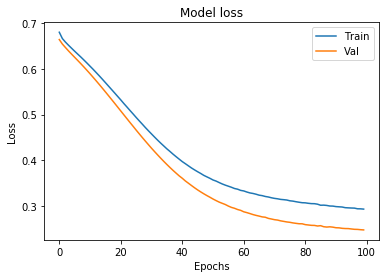

In [8]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Val'], loc = 'upper right')
plt.show()

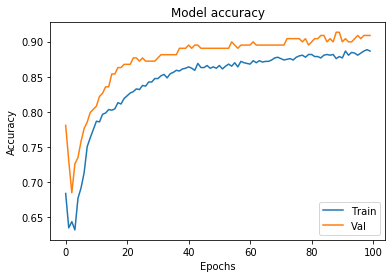

In [9]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Val'], loc = 'lower right')
plt.show()

In [10]:
model_2 = Sequential([Dense(1000,activation = 'relu',input_shape = (10,)), Dense(1000,activation = 'relu'), Dense(1000,activation = 'relu'), Dense(1000,activation = 'relu'), Dense(1,activation = 'sigmoid'),])
model_2.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
hist_2 = model_2.fit(X_train,Y_train, batch_size = 32, epochs = 100, validation_data = (X_val,Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5162 - accuracy: 0.7221 - val_loss: 0.3776 - val_accuracy: 0.8402
Epoch 2/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3728 - accuracy: 0.8552 - val_loss: 0.3047 - val_accuracy: 0.8402
Epoch 3/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3436 - accuracy: 0.8542 - val_loss: 0.2642 - val_accuracy: 0.8767
Epoch 4/100
1022/1022 [==============================] - 5s 4ms/step - loss: 0.3105 - accuracy: 0.8669 - val_loss: 0.2709 - val_accuracy: 0.8767
Epoch 5/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2734 - accuracy: 0.8836 - val_loss: 0.2933 - val_accuracy: 0.8356
Epoch 6/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2980 - accuracy: 0.8894 - val_loss: 0.2607 - val_accuracy: 0.8995
Epoch 7/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.2904

Epoch 57/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1734 - accuracy: 0.9207 - val_loss: 0.3421 - val_accuracy: 0.8813
Epoch 58/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1582 - accuracy: 0.9325 - val_loss: 0.3087 - val_accuracy: 0.8950
Epoch 59/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1530 - accuracy: 0.9413 - val_loss: 0.3440 - val_accuracy: 0.8904
Epoch 60/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1593 - accuracy: 0.9374 - val_loss: 0.3096 - val_accuracy: 0.9132
Epoch 61/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1435 - accuracy: 0.9442 - val_loss: 0.3514 - val_accuracy: 0.9087
Epoch 62/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.1371 - accuracy: 0.9432 - val_loss: 0.4112 - val_accuracy: 0.9087
Epoch 63/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1745 - accuracy: 0.9207 - val_loss: 0.3976 -

In [11]:
model_2.evaluate(X_test,Y_test)[1] * 100

219/219 [==============================] - 0s 250us/step


88.58447670936584

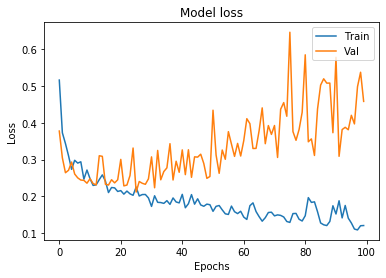

In [12]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Val'], loc = 'upper right')
plt.show()

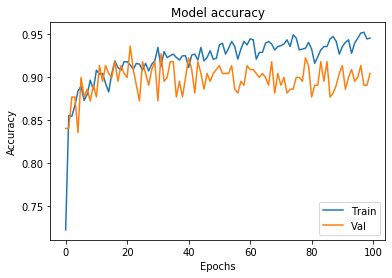

In [13]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Val'], loc = 'lower right')
plt.show()

In [14]:
model_3 = Sequential([Dense(1000,activation = 'relu',kernel_regularizer = regularizers.l2(0.01),input_shape = (10,)),Dropout(0.3),Dense(1000,activation = 'relu',kernel_regularizer = regularizers.l2(0.01)),Dropout(0.3),Dense(1000,activation = 'relu',kernel_regularizer = regularizers.l2(0.01)),Dropout(0.3),Dense(1000,activation = 'relu',kernel_regularizer = regularizers.l2(0.01)),Dropout(0.3), Dense(1,activation = 'sigmoid'),])
model_3.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
hist_3= model_3.fit(X_train,Y_train, batch_size = 32, epochs = 100, validation_data = (X_val,Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 4s 4ms/step - loss: 14.1882 - accuracy: 0.5998 - val_loss: 3.8265 - val_accuracy: 0.7717
Epoch 2/100
1022/1022 [==============================] - 3s 3ms/step - loss: 1.6591 - accuracy: 0.8209 - val_loss: 0.6551 - val_accuracy: 0.8950
Epoch 3/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.5459 - accuracy: 0.8581 - val_loss: 0.4288 - val_accuracy: 0.9224
Epoch 4/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.4797 - accuracy: 0.8689 - val_loss: 0.5157 - val_accuracy: 0.8174
Epoch 5/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.4801 - accuracy: 0.8542 - val_loss: 0.4067 - val_accuracy: 0.9087
Epoch 6/100
1022/1022 [==============================] - 5s 5ms/step - loss: 0.4576 - accuracy: 0.8669 - val_loss: 0.3748 - val_accuracy: 0.9087
Epoch 7/100
1022/1022 [==============================] - 5s 5ms/step - loss: 0.445

Epoch 57/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3673 - accuracy: 0.8718 - val_loss: 0.3277 - val_accuracy: 0.9041
Epoch 58/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3566 - accuracy: 0.8826 - val_loss: 0.3187 - val_accuracy: 0.9041
Epoch 59/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3712 - accuracy: 0.8885 - val_loss: 0.3391 - val_accuracy: 0.8995
Epoch 60/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3810 - accuracy: 0.8767 - val_loss: 0.3359 - val_accuracy: 0.8904
Epoch 61/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3696 - accuracy: 0.8836 - val_loss: 0.3226 - val_accuracy: 0.9041
Epoch 62/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3699 - accuracy: 0.8777 - val_loss: 0.3285 - val_accuracy: 0.9041
Epoch 63/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3734 - accuracy: 0.8806 - val_loss: 0.3290 -

In [15]:
model_3.evaluate(X_test,Y_test)[1] * 100

219/219 [==============================] - 0s 455us/step


89.49771523475647

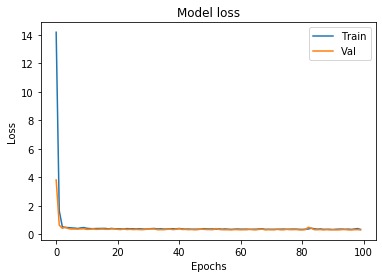

In [16]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Val'], loc = 'upper right')
plt.show()

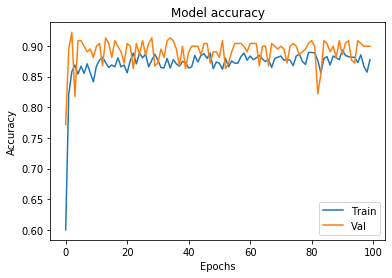

In [17]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Val'], loc = 'lower right')
plt.show()